## EDA on Titanic Dataset


In [4]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

# 📂 Load Titanic dataset
df = sns.load_dataset('titanic')
print("Dataset Loaded Successfully ✅")

# 🧾 Preview the data
display(df.head())


Dataset Loaded Successfully ✅


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:

# 🧼 Step 1: Data Overview
print(df.info())
display(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

# 🔍 Step 2: Missing Value Check
missing = df.isnull().sum()
display(missing[missing > 0].sort_values(ascending=False))



,0
deck,688
age,177
embarked,2
embark_town,2


In [9]:
# 🧽 Step 3: Handle Missing Data (Safe fix)

# Fill 'embarked' with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Handle 'deck' (categorical column): Add 'Unknown' to categories first
if 'Unknown' not in df['deck'].cat.categories:
    df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'] = df['deck'].fillna('Unknown')

# Flag missing ages for analysis
df['age_missing'] = df['age'].isnull()

# Fill 'age' with median grouped by 'sex' and 'pclass'
df['age'] = df['age'].fillna(df.groupby(['sex', 'pclass'])['age'].transform('median'))


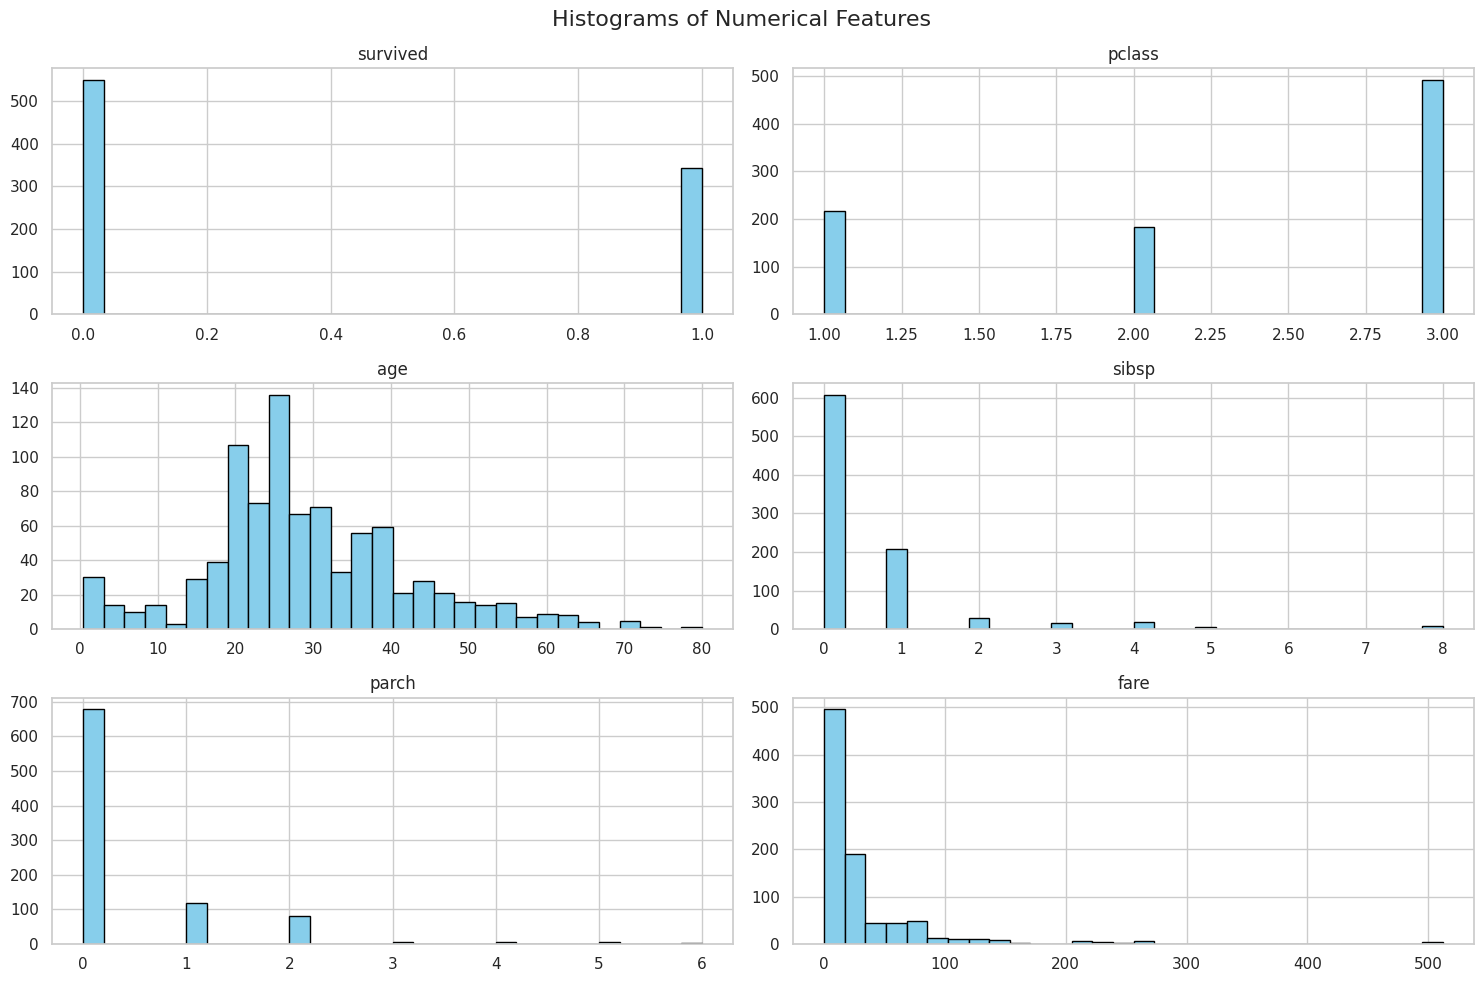

In [10]:

# 📊 Step 4: Histograms of Numerical Features
numerical = df.select_dtypes(include=np.number).columns
df[numerical].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


Age is left-skewed (more young adults).

Fare has extreme values (outliers — probably 1st class luxury fares).



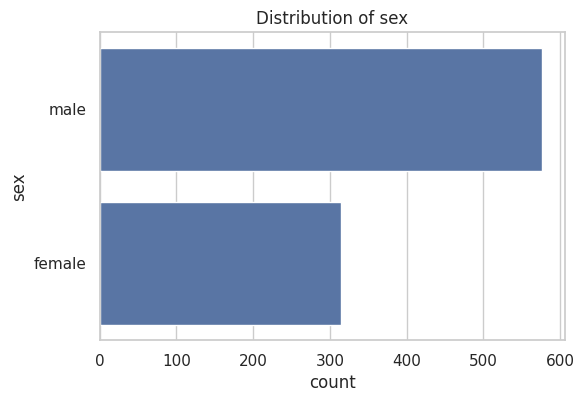

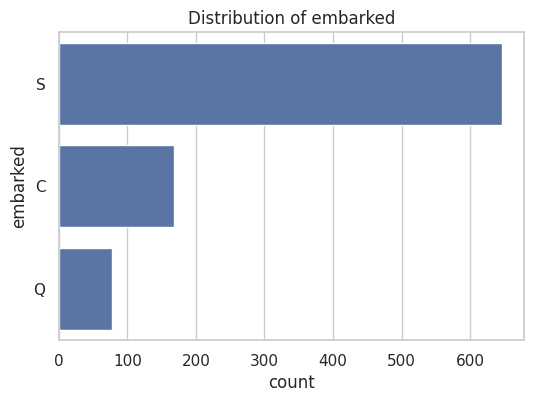

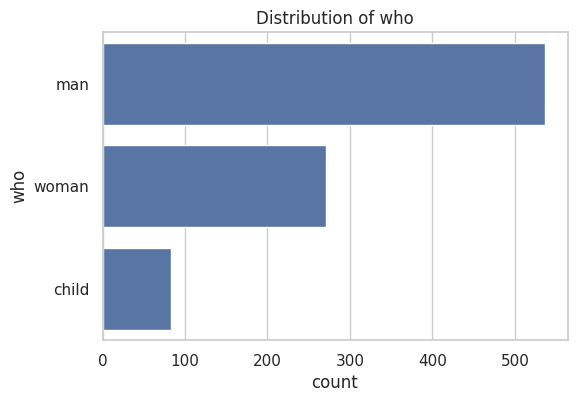

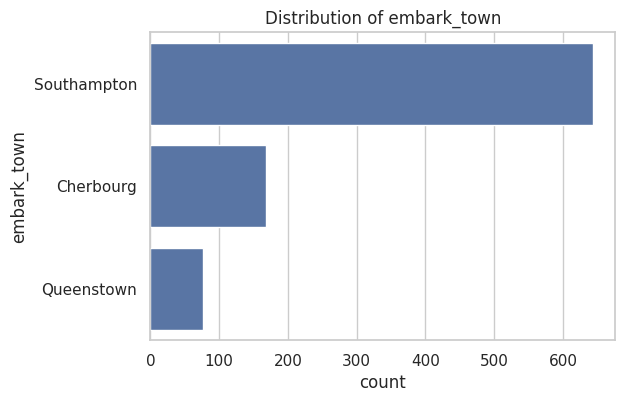

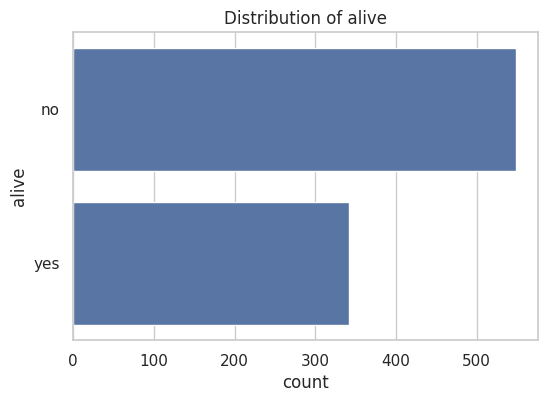

In [11]:

# 📦 Step 5: Categorical Feature Distributions
categorical = df.select_dtypes(include='object').columns
for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


Shows how common different categories are (e.g., more males, most people embarked from Southampton). Useful for identifying class imbalance.

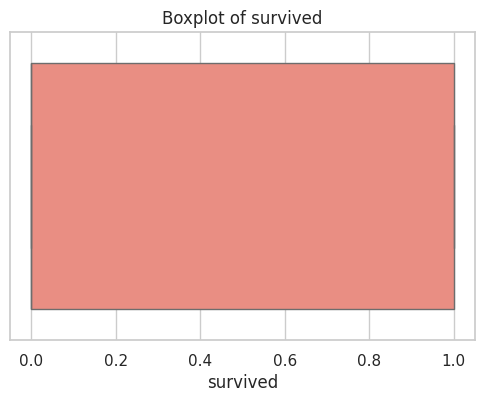

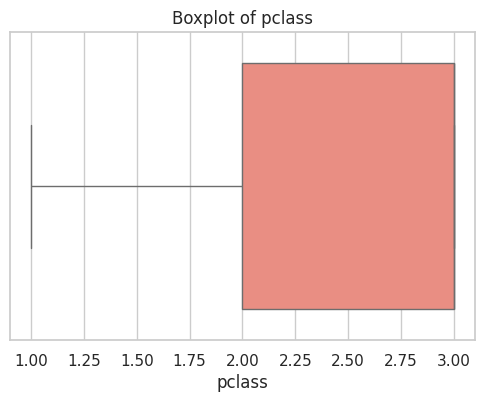

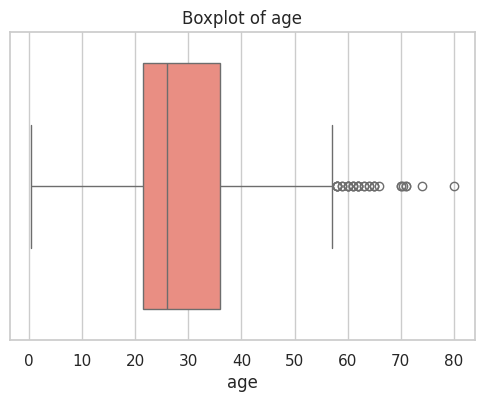

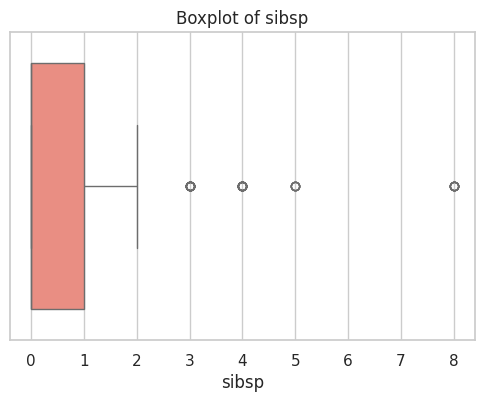

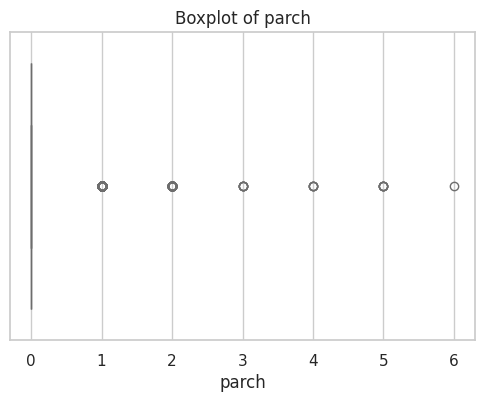

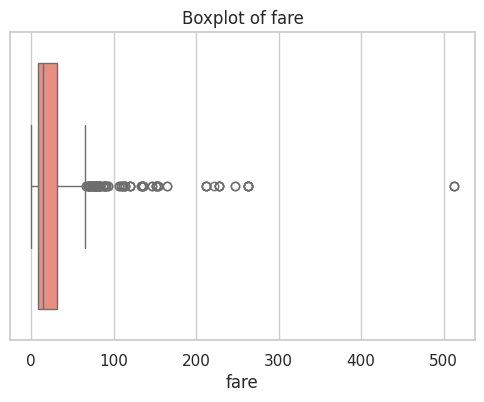

In [12]:

# 🚨 Step 6: Outlier Detection via Boxplots
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.show()


Boxplots reveal outliers in fare and age — especially some very high fares. These might belong to rich passengers who were more likely to survive.

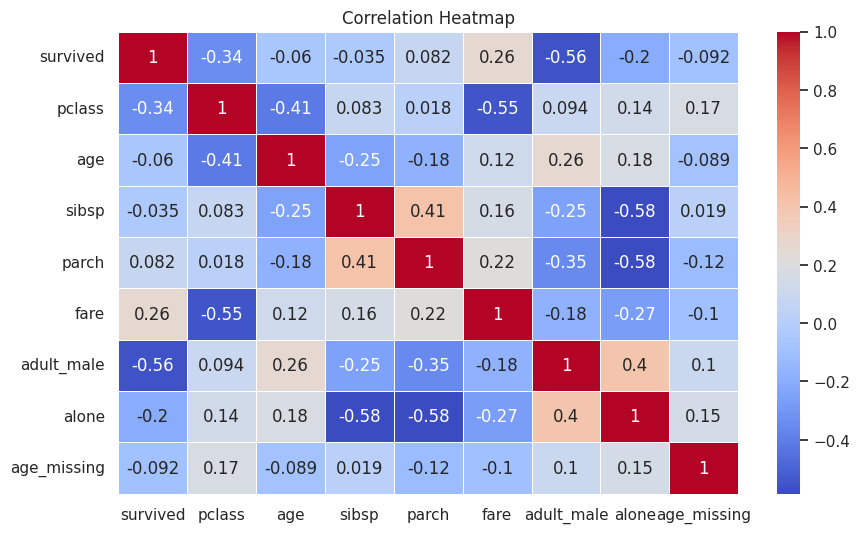

In [13]:

# 🔥 Step 7: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Looks at how numerical features are related. 'Pclass' and 'fare' are negatively correlated (makes sense: higher class, higher fare). 'Survived' is weakly correlated with 'fare' and 'pclass'.

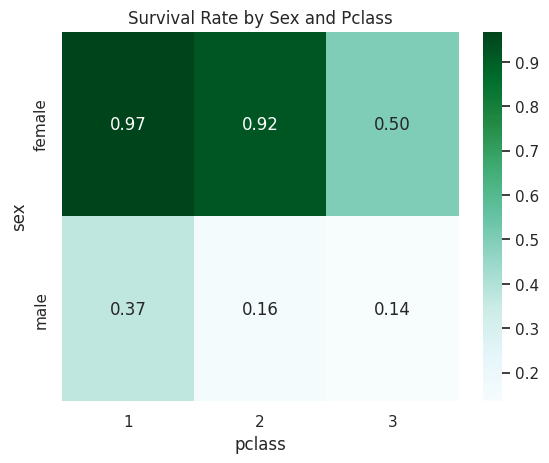

In [14]:

# 🎯 Step 8: Survival by Sex & Pclass
grouped = df.groupby(['sex', 'pclass'])['survived'].mean().unstack()
sns.heatmap(grouped, annot=True, cmap='BuGn', fmt='.2f')
plt.title('Survival Rate by Sex and Pclass')
plt.show()


Females in 1st class had highest survival (~97%), males in 3rd class had lowest (13%). Highlights the inequality during evacuation!

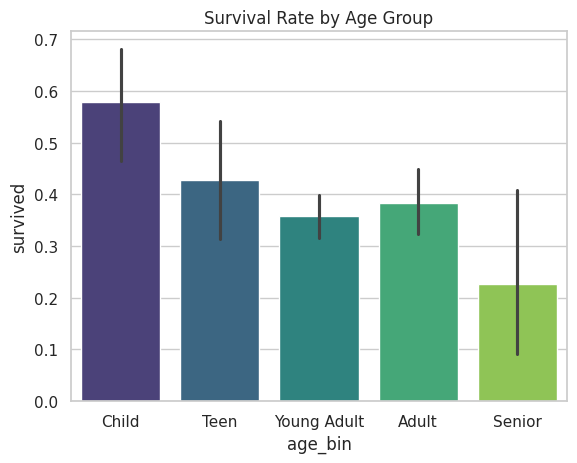

In [15]:

# 🧠 Step 9: Age Grouping
df['age_bin'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_bin', y='survived', data=df, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.show()


Younger passengers (children, teens) had a higher survival rate. Seniors had the lowest. “Women and children first” reflects in the data.

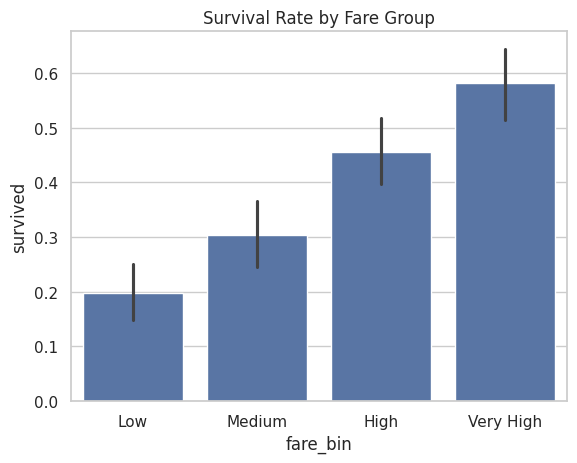

In [16]:

# 💰 Step 10: Fare Grouping
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='fare_bin', y='survived', data=df)
plt.title('Survival Rate by Fare Group')
plt.show()


Higher fare groups (1st class) had better survival — consistent with access to lifeboats and priority evacuation.

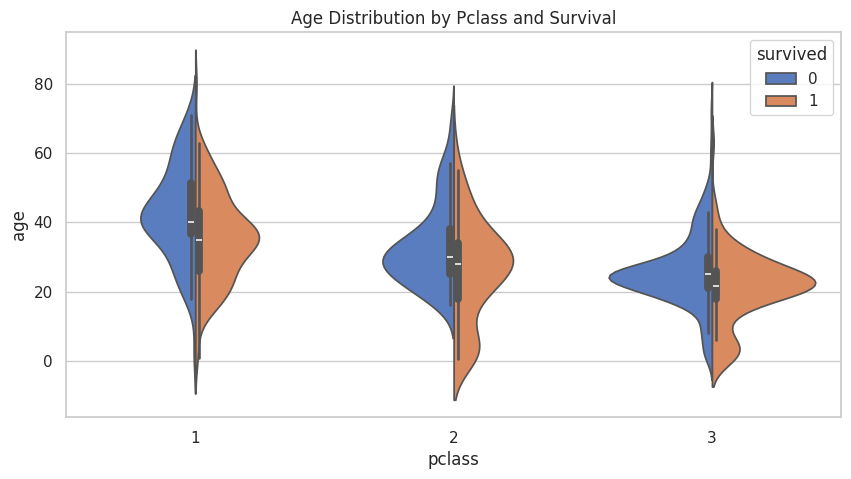

In [17]:

# 🎻 Step 11: Violin & Swarm Plots
plt.figure(figsize=(10, 5))
sns.violinplot(x='pclass', y='age', hue='survived', data=df, split=True, palette='muted')
plt.title('Age Distribution by Pclass and Survival')
plt.show()


Violin plot shows most survivors in 1st class were younger, while 3rd class had more non-survivors. Swarm plot reveals a lot of women with high fares survived — again, wealth & gender mattered.

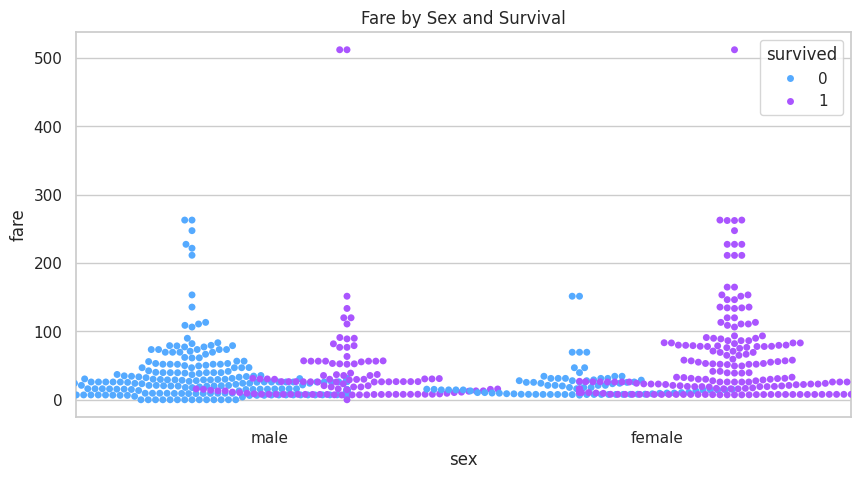

In [18]:

plt.figure(figsize=(10, 5))
sns.swarmplot(x='sex', y='fare', hue='survived', data=df, dodge=True, palette='cool')
plt.title('Fare by Sex and Survival')
plt.show()


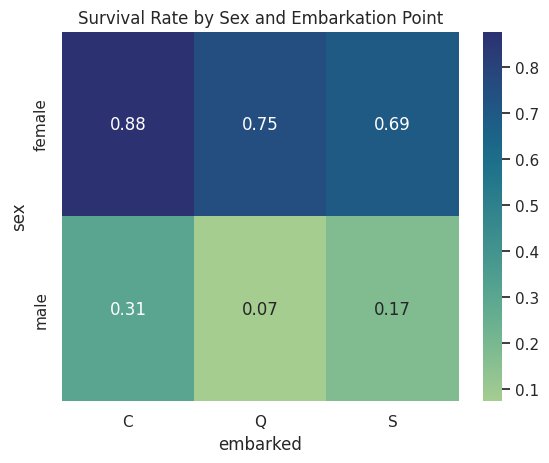

In [19]:

# 🧮 Step 12: Pivot Table for Survival Analysis
pivot = df.pivot_table(values='survived', index='sex', columns='embarked', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='crest', fmt='.2f')
plt.title('Survival Rate by Sex and Embarkation Point')
plt.show()


Women boarding at Cherbourg (C) had the highest survival. Southampton (S) had the lowest for men. Geography mattered!

In [20]:

# 📐 Step 13: Skewness and Kurtosis
for col in ['age', 'fare']:
    print(f"{col.capitalize()} - Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}")



Age - Skewness: 0.53, Kurtosis: 0.72
Fare - Skewness: 4.79, Kurtosis: 33.40


Skewness tells us about asymmetry (Fare is heavily right-skewed). Kurtosis tells us about tail weight — Fare has fat tails (extreme values). These may affect model training later.

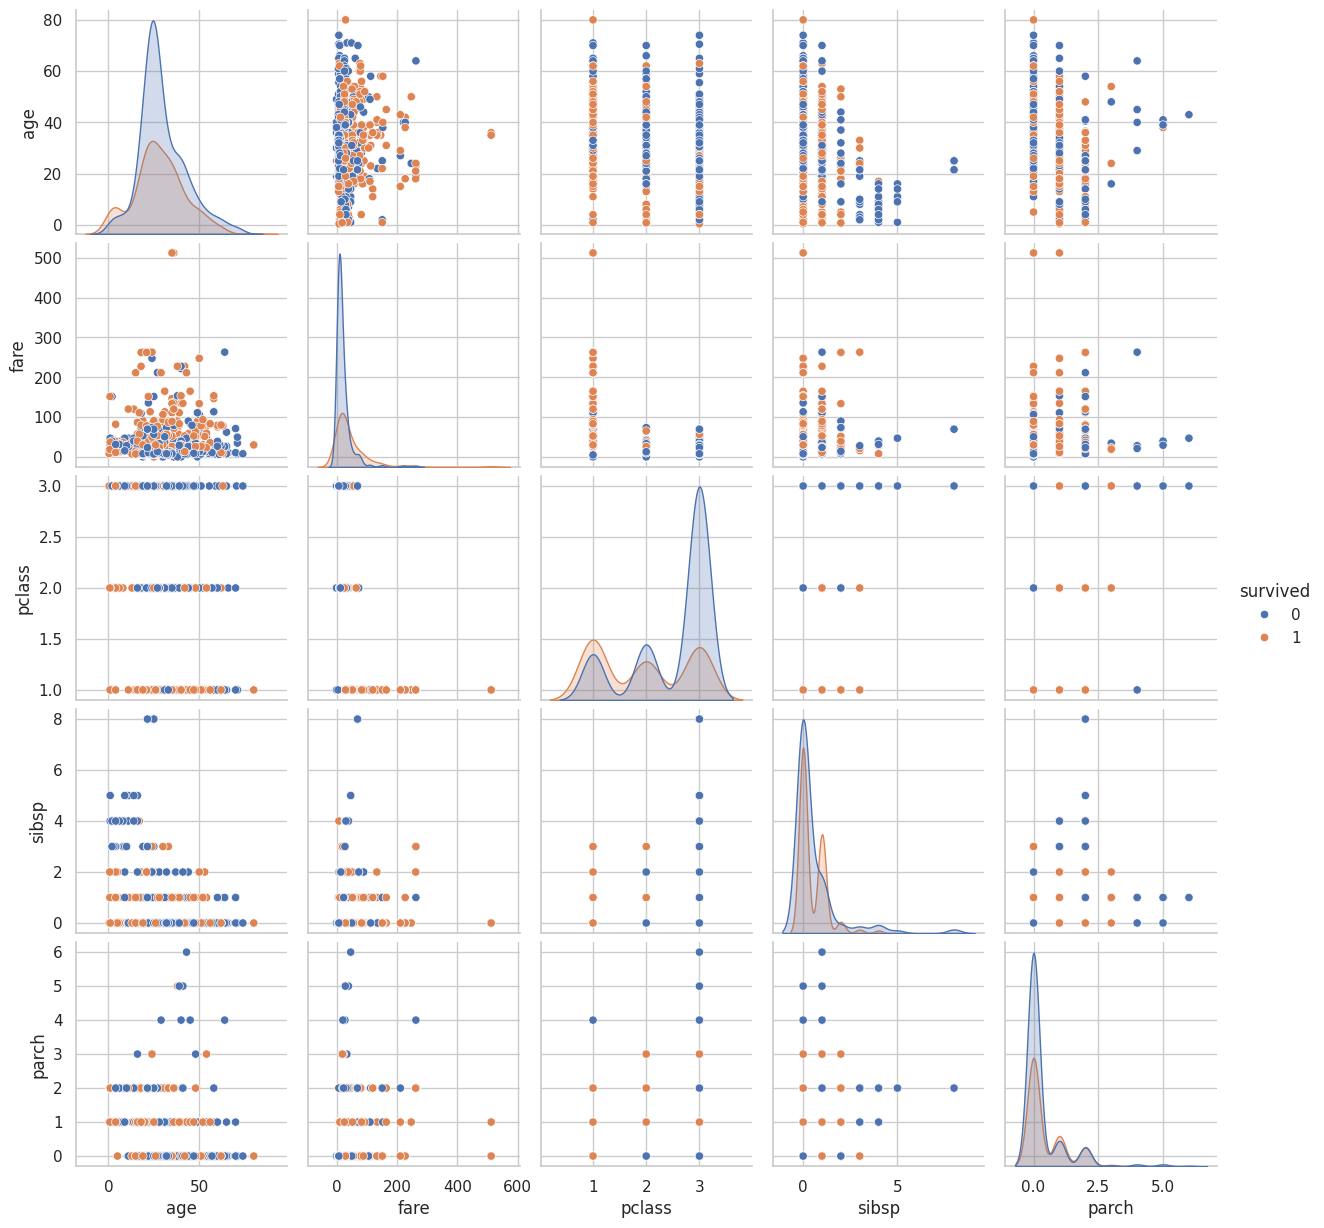

In [22]:
# Step 14: Pairplot
sns.pairplot(df[['survived', 'age', 'fare', 'pclass', 'sibsp', 'parch']], hue='survived')
plt.show()
